## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
def missingness_summary(df, print_log=False, sort='none'):
    summary = df.apply(lambda x: x.isna().sum() / x.shape[0])
    
    if print_log == True:
        if sort == 'none':
            print(summary)
        elif sort == 'ascending':
            print(summary.sort_values())
        elif sort == 'descending':
            print(summary.sort_values(ascending=False))
        else:
            print('Invalid value for sort parameter.')
        
    return summary

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

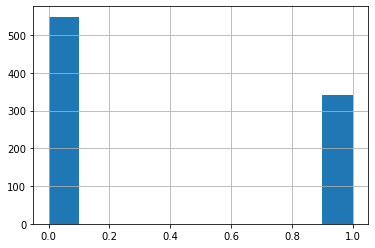

In [6]:
# Calculate value counts for the Survived column

data['Survived'].hist()


First, check for missing data and remove all columns containing missing data

In [13]:
# Calculate NA values per column
missingness_summary(data, print_log=True, sort='descending')
titanic = data.drop(columns=['Cabin', 'Age', 'Embarked']).copy()
titanic.head()

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


We also drop columns that are not informative and contain too many unique values(e.g. name)

In [14]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))    

Column with name 'PassengerId' has 891 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Name' has 891 unique values
Column with name 'Sex' has 2 unique values
Column with name 'Age' has 88 unique values
Column with name 'SibSp' has 7 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Ticket' has 681 unique values
Column with name 'Fare' has 248 unique values
Column with name 'Cabin' has 147 unique values
Column with name 'Embarked' has 3 unique values


In [16]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Ticket'])



To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [20]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.
titanic = pd.get_dummies(titanic,columns=['Sex'], drop_first=True)



In [23]:
# Let's check the new columns
titanic.head()
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Sex_male  891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(1)
memory usage: 35.8 KB


Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [24]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split

X = titanic.drop(columns=('Survived'))
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# answer below:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

0.8834269662921348
0.7374301675977654
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       103
           1       0.68      0.71      0.70        76

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [34]:
# answer below:
'''This model is definitely overfitting, but based on the classification report, it is doing rather poorly even for the training data
|'''


'This model is definitely overfitting, but based on the classification report, it is doing rather poorly even for the training data\n|'

Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [41]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [42]:
# answer below:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    
    f1_train.append(f1_score(y_train, y_train_pred))
    f1_test.append(f1_score(y_test, y_test_pred))


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

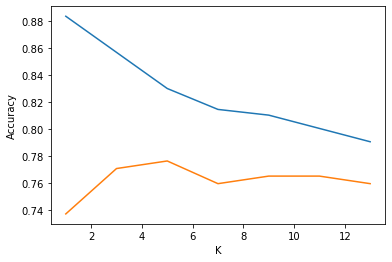

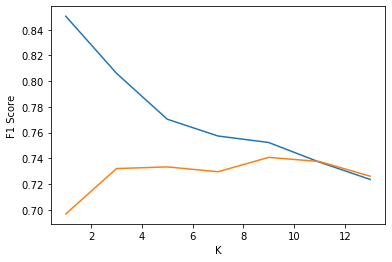

In [49]:
# answer below:
plt.plot(k_list, accuracy_train, label='Train Accuracy')
plt.plot(k_list, accuracy_test, label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

plt.plot(k_list, f1_train, label='Train F1')
plt.plot(k_list, f1_test, label='Test F1')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.show()


Please comment the results of the plots above

###### Add your observations in comments below.
 As K increases, the model begins to correct the original over fitting. At 10-12 k, the predictions for the train and test sets become indistiguishable. This is where the most generalizable fit is. With a maximum accuracy of about 78% for the testing data, these models would benefit from addition data. By imputing some of the missing points in the raw data, more accuracy and better precision and recall can be gained.
